In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import yfinance as yf
import pandas as pd

import sys
sys.path.append('../')
from label_algorithms import oracle
import utils as weights_utils
import compare_with_first as cwf
import comapre_with_last as cwl
import comapre_with_prev as cwp

In [2]:
ticker_symbol = 'GC=F'
start_date = '2023-10-20'
end_date = '2023-10-21'
start_time = "10:50:00"
end_time = "12:00:00"

prices = yf.download(ticker_symbol, start_date, end_date, interval='1m')['Close'].between_time(start_time, end_time)
prices.index = prices.index.tz_localize(None)

fee = 0.0004
labels = oracle.get_labels(prices, fee=fee)
labels[labels == 0] = -1

[*********************100%%**********************]  1 of 1 completed


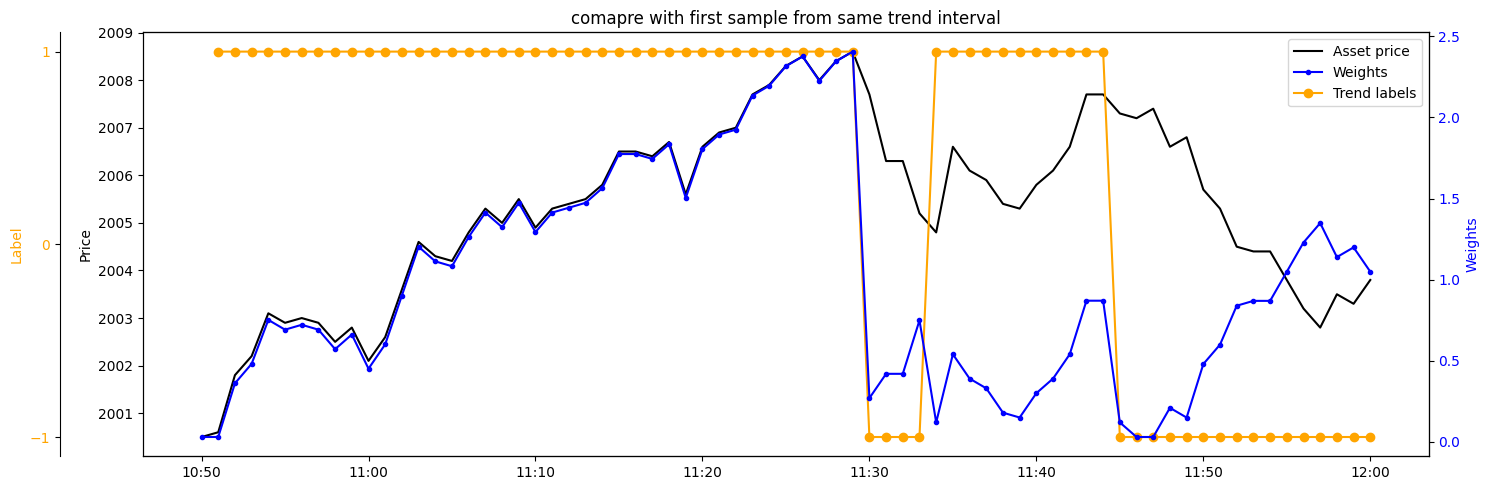

In [3]:
weights = cwf.get_weights(prices, labels)
weights_utils.plot_weights('comapre with first sample from same trend interval', prices, labels, weights)

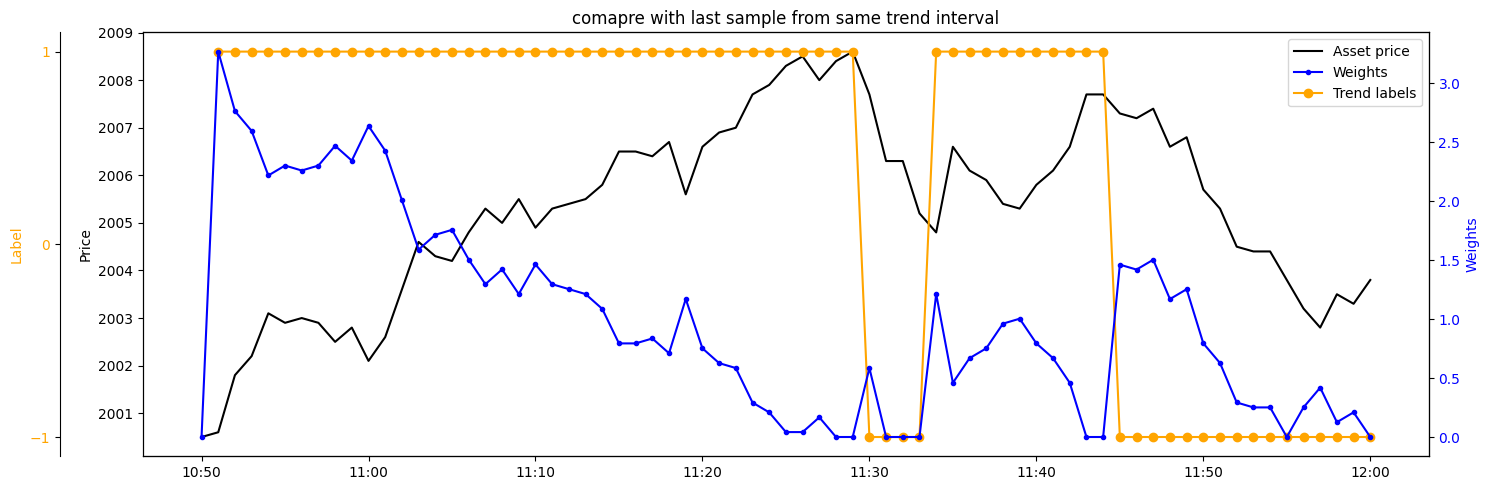

In [4]:
weights = cwl.get_weights(prices, labels)
weights_utils.plot_weights('comapre with last sample from same trend interval', prices, labels, weights)

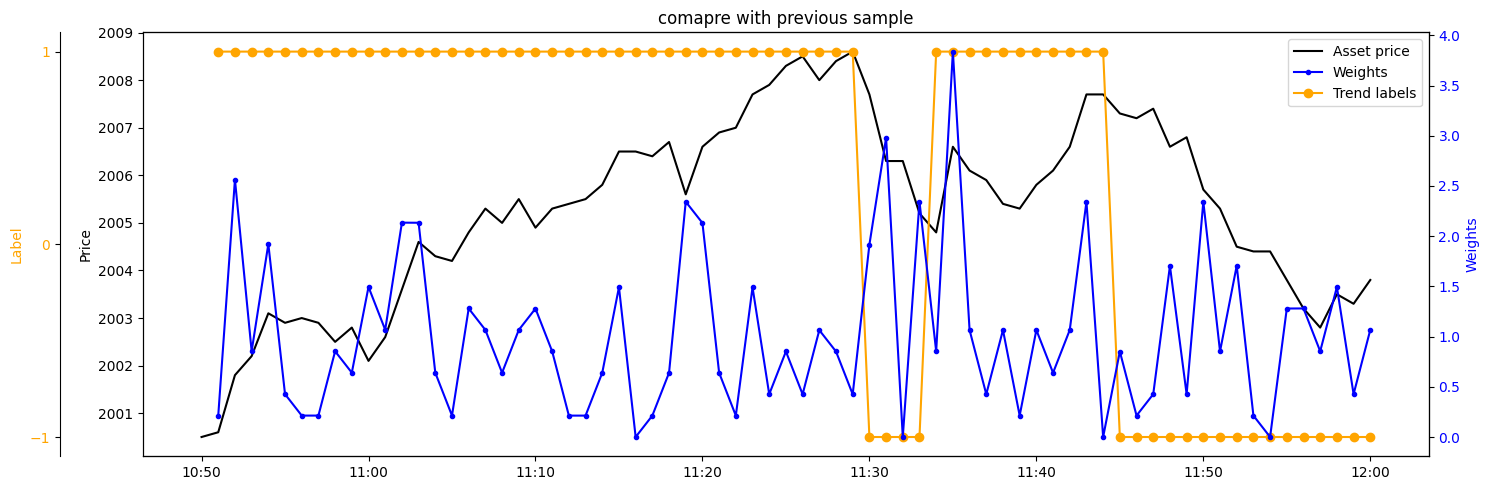

In [5]:
weights = cwp.get_weights(prices, labels)
weights_utils.plot_weights('comapre with previous sample', prices, labels, weights)